Predicting the Output for a Multistage Factory Process using Machine Learning

---

### **Problem Description**

A multistage manufacturing process refers to a system encompassing multiple components, stations or stages required to finish the final product, being very common in modern manufacturing. Typically, the quality of the final product depends on the complex interactions between different stages. Thus, the quality characteristics at one stage are not only influenced by local variations at that stage, but also by variations propagated from upstream stages.

In this context predictive models based on machine learning can be used in the development of real time process controllers, anomaly detection, quality control, etc.

<img width=400px align="right" src="https://p2.piqsels.com/preview/730/1011/600/plant-production-industry-manufactures-thumbnail.jpg" title="Source: [Online] https://p2.piqsels.com/preview/730/1011/600/plant-production-industry-manufactures-thumbnail.jpg">
      
### **Data**

The dataset contains data sampled every minute from one production run of a multistage continuous flow manufacturing process spanning several hours. The focus is put on three machines operating in parallel at the first stage, which then feed their outputs into a step that combines the flows. 

The output from the combiner step is measured in 6 different locations. The **goal** is to predict the measurements of the output from this stage, based on the data from the shopfloor environment and operations upstream. 

### **Required Material**

The assignment will be developed using **Google Colaboratory** to ensure that everyone has access to the same computational resources, without requiring additional configuration effort.

https://colab.research.google.com/

Google Colab provides a platform that allows you to write and execute Python notebooks
in the browser, with minimal configuration required and free access to GPUs.

The .ipynb provided by the the teaching staff should be uploaded to the student's Google Drive (using the University's student account) and opened directly in Colab.

**Recommended Packages:** *Pandas* and *Numpy* (data structures and manipulation), *Scikit-Learn* (Machine Learning), *Matplotlib* and *Seaborn* (visualization).

### **Submission Guidelines and Deadline**
* Completed projects should be submitted via the course's **Moodle** page before the end of the deadline.
* Projects should be executed in groups of 2 or 3 (maximum) students. 
* The project should be submitted as a **single .ipynb** notebook file, named following the template **"*studentNumber1_studentNumber2_studentNumber3.rar*"** (e.g. *31444_31445_31446.rar*) containing:
   * The complete jupyter notebook contemplating the data analysis / machine learning part of the assignment. You can use the template provided in the CLIP platform which simultaneous serves as a guideline, project template and report.
* Deadline is **19 of December, 23:59 GMT**.

### **Evaluation Criteria**

All of the goal/value pairs listed below are based on the assumption that a correct implementation is submitted. 

Feel free to fill in the *Completed* column in accordance to your submission for the discussion (replace "*-*" with "*X*" when suitable).



Please refer to the lab staff for additional info regarding possible additional features. Examples include for instance performing feature extraction on the original dataset to check if newly created features improve performance or tuning the models' hyper-parameters (please refer to the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) which includes several examples) to optimize performance.



---



### **TO DO**: 
1) Load the training data 
* Use read_csv (pandas) to load data into a dataframe 
* Use the dataframe's head() to check the first few rows 


In [ ]:
import pandas as pd
data= pd.read_csv('/content/si_lab2_dataset.csv')
data.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual
0,06/03/2019 10:52:00,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,48.03,10.48,436.76,76.3,75.1,12.59,236,601.11,257,200.75,69.37,69.06,73.25,13.89,246.68,68.8,60.1,9.02,186,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0,99.1,108.2,80.0,0.0,12.16,0.00,17.30,5.54,2.69
1,06/03/2019 10:52:01,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,48.03,10.48,436.77,76.3,75.1,12.59,236,601.11,257,220.16,69.35,69.05,73.19,13.89,246.02,69.0,60.0,9.02,186,421.16,200,213.36,78.1,78.4,341.85,13.59,262.88,65.3,65.0,99.1,109.2,80.0,0.0,0.00,0.00,17.31,5.13,2.70
2,06/03/2019 10:52:02,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,48.16,10.48,425.46,76.3,75.1,12.59,236,601.11,257,216.84,69.37,69.07,73.19,13.85,247.18,68.9,60.0,9.02,186,421.16,200,225.25,78.1,78.5,338.71,14.00,262.63,65.3,65.0,99.6,111.0,80.0,0.0,0.00,0.00,17.31,5.13,2.70
3,06/03/2019 10:52:03,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,48.57,10.48,437.01,76.3,75.1,12.59,236,601.11,257,208.61,69.38,69.08,72.81,13.90,249.92,69.1,59.9,9.02,186,421.16,200,213.99,78.1,78.5,339.15,13.67,262.22,65.4,65.0,99.6,109.2,80.0,0.0,0.00,0.00,17.31,5.13,2.70
4,06/03/2019 10:52:04,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,48.57,10.48,425.18,76.4,75.1,12.59,236,601.11,257,212.31,69.40,69.07,73.00,13.89,250.58,68.9,59.9,9.02,186,421.16,200,200.86,78.0,78.5,337.05,13.72,262.17,65.4,65.0,99.6,109.8,80.0,0.0,0.00,31.44,17.30,5.15,2.72


### **TO DO**: 
2) Check the shape and sum of missing values per feature using the .shape and .isna().sum() functions from Pandas' Dataframe.

In [ ]:
data.shape
data.isna()
data.sum()

time_stamp                                            06/03/2019 10:52:0006/03/2019 10:52:0106/03/20...
AmbientConditions.AmbientHumidity.U.Actual                                                       215980
AmbientConditions.AmbientTemperature.U.Actual                                                    335885
Machine1.RawMaterial.Property1                                                                   166948
Machine1.RawMaterial.Property2                                                                  2897568
Machine1.RawMaterial.Property3                                                              1.34073e+07
Machine1.RawMaterial.Property4                                                                  3506065
Machine1.RawMaterialFeederParameter.U.Actual                                                1.75068e+07
Machine1.Zone1Temperature.C.Actual                                                          1.01445e+06
Machine1.Zone2Temperature.C.Actual                              

### **TO DO**: 
3) Drop rows containing missing values using .dropna . Verify if rows were correctly dropped by printing the dataframe's shape.

In [ ]:
data.dropna(inplace=True)
data.shape

(14071, 48)

### **TO DO**: 
4) Generate descriptive statistics. These include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [ ]:
data.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual
count,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,14071.000000,1.407100e+04,14071.000000
mean,15.331392,23.843480,11.850955,205.676640,951.623678,248.868737,1242.782131,72.013311,72.012773,70.337820,11.071685,409.016935,81.470354,75.965545,12.793403,239.911591,566.367247,256.217682,202.591444,68.996910,69.100997,73.398745,13.896803,226.121548,76.813025,60.001361,9.090745,205.638618,425.007964,203.037808,202.380479,78.008290,78.004914,345.115456,13.269817,246.749568,74.140641,65.008235,108.915284,84.883887,80.003712,8.055464,11.356489,32.877711,17.965137,1.493326e+00,2.880966
std,1.188786,0.373492,0.510078,11.610716,126.723695,3.298969,95.831195,0.063165,0.406302,5.521117,0.635063,20.468929,0.929056,2.058674,0.107298,2.063423,18.327320,0.412685,15.107278,0.057051,0.108875,0.395964,0.029170,3.098536,0.851434,0.162106,0.396763,16.319586,9.562258,2.177515,15.655831,0.076795,0.114710,9.080889,0.434524,6.123396,2.056710,0.062472,5.669093,18.577822,0.118395,6.903736,1.050356,3.862025,4.199665,2.543083e+00,0.941176
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,10.390000,359.470000,76.300000,69.700000,12.590000,236.000000,556.700000,256.000000,0.000000,68.670000,67.780000,71.560000,13.820000,218.870000,68.800000,59.598710,8.830000,186.000000,408.970000,200.000000,0.000000,77.278364,77.700000,321.250000,11.960000,235.060000,65.300000,64.800000,45.300000,53.300000,79.600000,-3.132803,-4.927832,-7.688987,-0.003638,-1.630000e-20,-1.225095
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,69.003133,10.520000,408.960000,81.000000,75.000000,12.850000,241.000000,556.700000,256.000000,194.160000,68.980000,69.070000,73.190000,13.870000,223.890000,76.900000,59.900000

### **TO DO**: 
5) Plot the correlation matrix for the dataset.

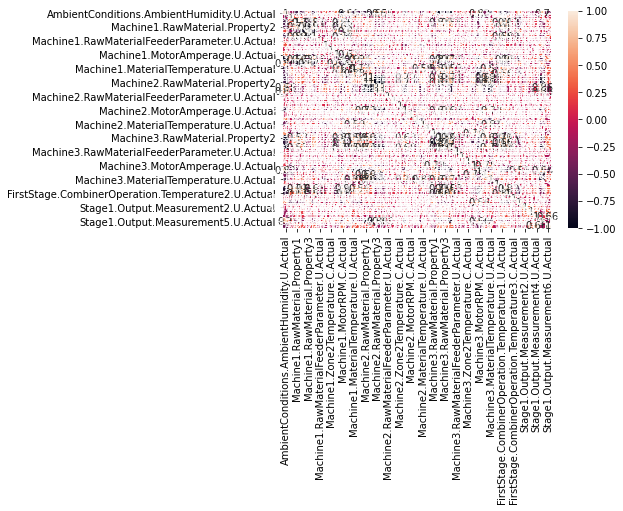

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot =True)
plt.show()

### **TO DO**: 
6) Build a dictionary with key/value pairs for each metric and calculate its value using the corresponding sklearn.metrics call. Build a pandas dataframe from the dict using pd.DataFrame.from_dict

In [ ]:
#TBD add the necessary imports
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from math import sqrt
def evaluate_regressor(name, y_test, y_pred):  
    """Calculate the main regression metrics supporting multi-target cases for a given model.  

    Args:
        name (str): The trained model's name
        y_test (series): Contains the ground truth values (aka y_true)
        y_pred (series): Contains the predicted values for the test set
        
    Returns:
        df_metrics (DataFrame): The predicted metrics in a DataFrame
        
    """
    name = [name]
    dict_metrics = {
        'Explained Variance': explained_variance_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }
    df_metrics = pd.DataFrame.from_dict(dict_metrics, orient='index', columns = name)
    return df_metrics


### **TO DO**: 
7) Train/Test Split:
* Split the dataset into X (inputs) and Y (outputs) (suggestion: use .iloc)

* Then use train_test_split from scikit-learn to further split them into X_train, X_test, y_train, and y_test with and appropriate test size (e.g. 20% or 33%)

* Ensure the data is shuffled, since we are not interested in the sequence, but instead want to see if there's any relation between the machine/process parameters in the multistage process upstream and the output

In [ ]:
from sklearn.model_selection import  train_test_split
import time


def slit_data(data):

    train, test = train_test_split(data, test_size=0.2)
    return train, test


### **TO DO**: 
8) Store the time_stamp for later in case we want to do some visualizations, and remove it from training/test set with .drop.

As previously stated, we are not interested in the temporal dimension of the dataset.

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
train, test = slit_data(data)
print(train.head())
time_stamp_train = train["time_stamp"]
time_stamp_test = test["time_stamp"]
train.drop(["time_stamp"], axis=1, inplace=True)
test.drop(["time_stamp"], axis=1, inplace=True)

print(len(time_stamp_train))
print(len(time_stamp_test))
X_train = train.iloc[:,:-6].values
Y_train = train.iloc[:,-6:].values
X_test = test.iloc[:,:-6].values
Y_test = test.iloc[:,-6:].values
columns = data.iloc[:,-6:].columns.values
print(columns)
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

                time_stamp  ...  Stage1.Output.Measurement6.U.Actual
8286   06/03/2019 13:10:47  ...                                 3.05
13374  06/03/2019 14:36:01  ...                                 3.38
10151  06/03/2019 13:42:02  ...                                 3.27
10862  06/03/2019 13:53:56  ...                                 3.36
9488   06/03/2019 13:30:55  ...                                 3.19

[5 rows x 48 columns]
11256
2815
['Stage1.Output.Measurement1.U.Actual'
 'Stage1.Output.Measurement2.U.Actual'
 'Stage1.Output.Measurement3.U.Actual'
 'Stage1.Output.Measurement4.U.Actual'
 'Stage1.Output.Measurement5.U.Actual'
 'Stage1.Output.Measurement6.U.Actual']
11256
11256
2815
2815


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### **TO DO**: 

9) Train at least 3 different regression models. Experiment with the model parameters (see the scikit-learn documentation) to aim for the best performance you can achieve.

In [ ]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Instantiate regressor
clf = LinearRegression(n_jobs = -1) #run 10 jobs in parallel #-1 max jobs

# clf1 = svm.SVR(kernel='linear')
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
clf2= GridSearchCV(Ridge(), alpha_values, cv=10 )

# Instantiate regressor
clf3 = RandomForestRegressor(n_estimators = 400 , n_jobs = -1, random_state = 66)

# Fit the regressor to the training data
clfs = [
        {
          "name":"LinearRegression",
          "clf":clf
        },
        {
          "name":"Ridge",
          "clf":clf2
        },
        {
          "name":"RandomForestRegressor",
          "clf":clf3
        }
        ]
predictions = []
metrics = []
for cl in clfs:


  cl["clf"].fit(X_train, Y_train)
  # Generate predictions from test set
  predict = cl["clf"].predict(X_test)
  predictions.append(predict)
  # Evaluate using evaluate_regressor

  df_rfr_metrics = evaluate_regressor("Metrics", Y_test, predict)
  print(df_rfr_metrics)
  metrics.append(df_rfr_metrics)

                     Metrics
Explained Variance  0.467010
MAE                 0.972517
MSE                 5.539375
RMSE                2.353588
R2                  0.466955


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

                     Metrics
Explained Variance  0.467197
MAE                 0.970466
MSE                 5.537813
RMSE                2.353256
R2                  0.467143
                     Metrics
Explained Variance  0.792263
MAE                 0.282846
MSE                 2.261190
RMSE                1.503725
R2                  0.791954


In [ ]:
#TBD

In [ ]:
#TBD

### **TO DO**: 
10) Implement a function that prints the RMSE and R2 values per target for a given model. Then call it for each of your models to get an overview of the results.

In [ ]:
def print_rmse_per_target():
    for index, m in enumerate(metrics):
      print("RMSE for classifier {0} => {1}".format(str(index), str(m.loc["RMSE"].values[0])))
      print("R2 for classifier {0} => {1}".format(str(index), str(m.loc["R2"].values[0])))
print_rmse_per_target()

RMSE for classifier 0 => 2.3535877778047776
R2 for classifier 0 => 0.4669551216189037
RMSE for classifier 1 => 2.3532557577146953
R2 for classifier 1 => 0.46714270099728616
RMSE for classifier 2 => 1.5037252079570402
R2 for classifier 2 => 0.791953716135439


In [ ]:
#TBD

In [ ]:
#TBD

In [ ]:
#TBD

### **TO DO**: 
11) Plot the True Values VS Predictions for each of the output measurements for your best model.

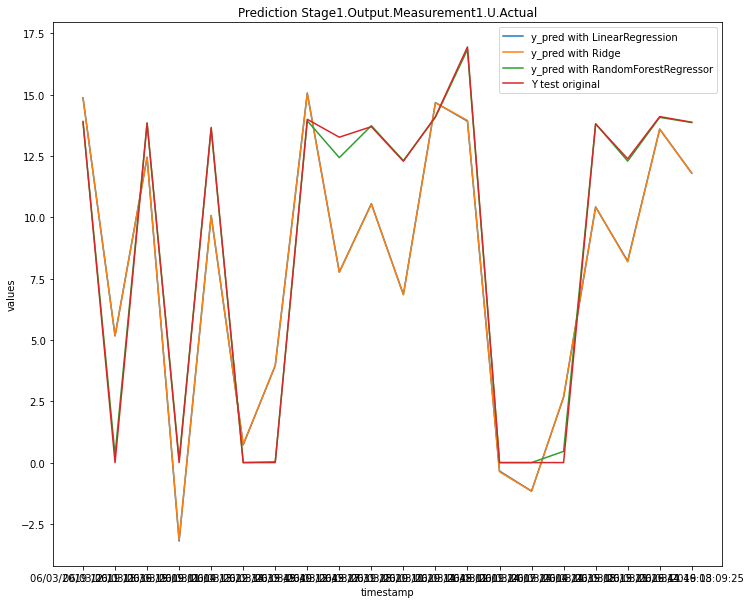

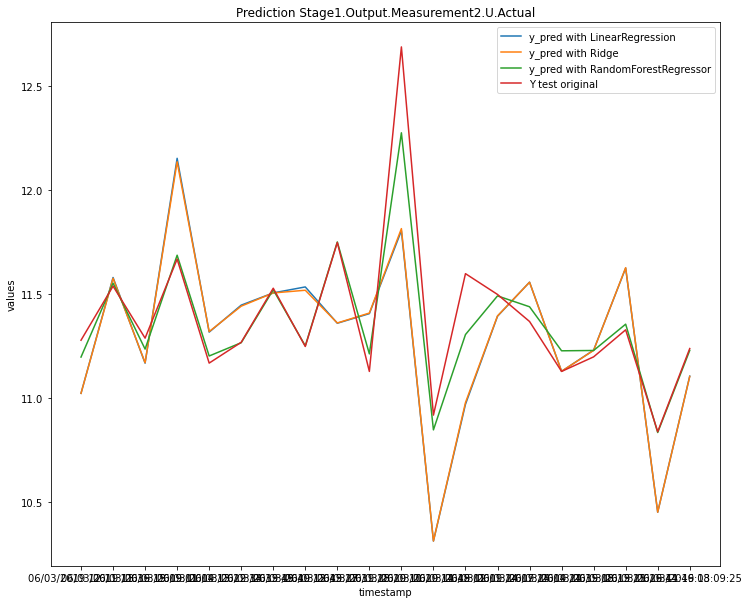

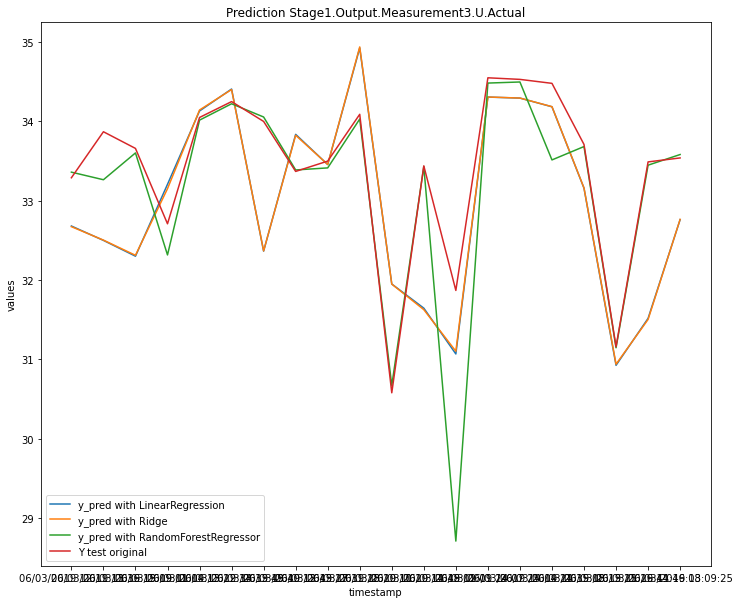

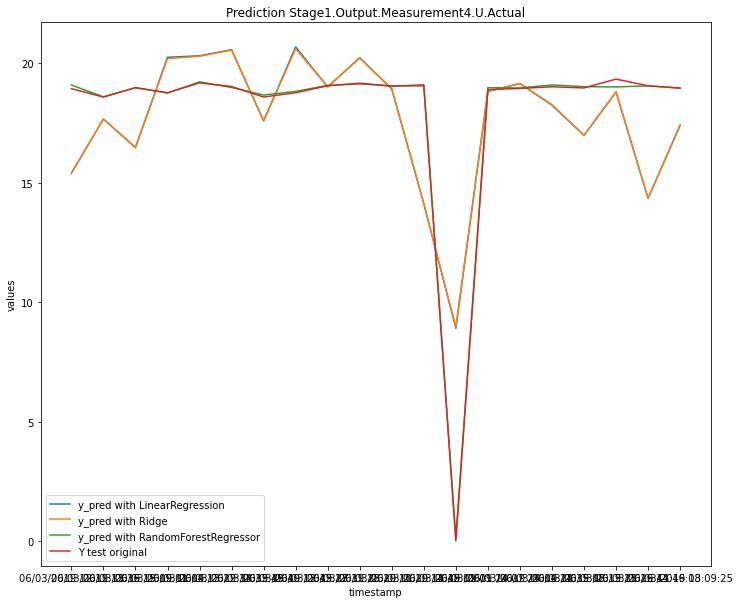

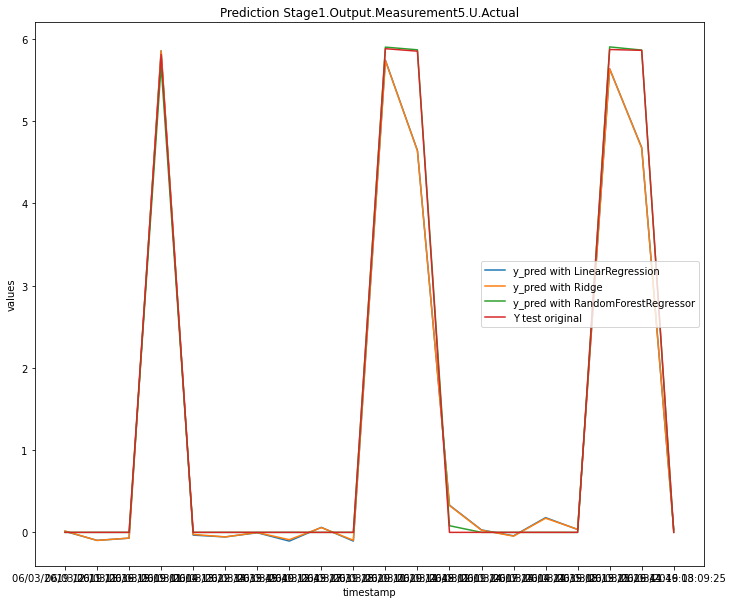

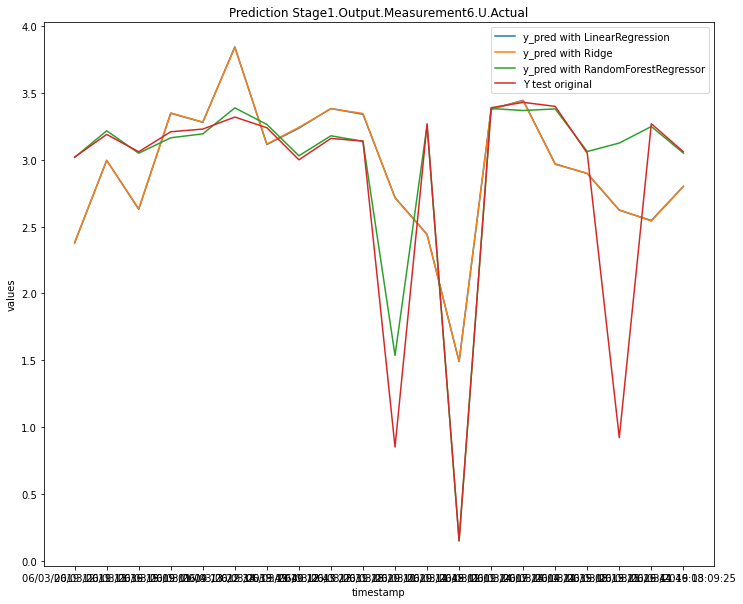

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
timestamp = time_stamp_test.values
batch_size = 20

num_features = predictions[0].shape[1]

for i in range(0, 6):
  plt.figure(figsize=(12,10))
  plt.title(f'Prediction {columns[i]}')
  plt.xlabel('timestamp')
  plt.ylabel(f'{columns[i]}')

  for index, prediction in enumerate(predictions):

    y_pred = prediction[:, i]
    plt.plot(timestamp[:batch_size], y_pred[:batch_size], label=f'y_pred with {clfs[index]["name"]}')

  Y_plot = Y_test[:, i]
  plt.plot(timestamp[:batch_size], Y_plot[:batch_size], label='Y test original')
  plt.legend()
  plt.show()



##Extras

In [ ]:
#TBD